# QCD estimate from same-sign muon+tau events

It is useful to construct a same-sign region for estimating the background due to multijet QCD in the $\mu+\tau_{h}$ channel.  We estimate this background using the fake rate method so this can be used as a cross-check or a replacement.  This method is used in the measurement of the $\tau_{h}$ efficiencies which I would like to recreate so that the measurement can be carried out _in situ_ and the uncertainty sources are not double counted.

In [239]:
# import and global set up
%cd '/home/naodell/work/wbr/analysis'
%matplotlib notebook
%pwd

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import scripts.plot_tools as pt

mpl.style.use('default')
params = {'legend.fontsize': 20,
          'axes.labelsize': 20,
          'axes.titlesize':'x-large',
          'xtick.labelsize':18,
          'ytick.labelsize':18,
         }
mpl.rcParams.update(params)
%matplotlib inline

/home/naodell/work/wbr/analysis


In [240]:
# get the data
# set up and get the data
labels = ['muon', 't', 'ttbar', 'wjets', 'zjets', 'diboson']

dm = pt.DataManager(input_dir     = 'data/flatuples/mutau_test/mutau_2016',
                    dataset_names = [d for l in labels for d in pt.dataset_dict[l]],
                    selection     = 'mutau',
                    period        = 2016,
                    scale         = 35.9e3,
                    cuts          = '' #lepton1_mt < 40 and p_miss_zeta - 0.85*p_vis_zeta > -25'
                   )
df_data_os  = dm.get_dataframe('data').query('lepton1_q != lepton2_q')
df_ttbar_os = dm.get_dataframe('ttbar').query('lepton1_q != lepton2_q')
df_top_os   = dm.get_dataframe('t').query('lepton1_q != lepton2_q')
df_z_os     = dm.get_dataframe('zjets').query('lepton1_q != lepton2_q')
df_w_os     = dm.get_dataframe('wjets').query('lepton1_q != lepton2_q')
df_vv_os    = dm.get_dataframe('diboson').query('lepton1_q != lepton2_q')

df_data_ss  = dm.get_dataframe('data').query('lepton1_q == lepton2_q').copy()
df_ttbar_ss = dm.get_dataframe('ttbar').query('lepton1_q == lepton2_q').copy()
df_top_ss   = dm.get_dataframe('t').query('lepton1_q == lepton2_q')
df_z_ss     = dm.get_dataframe('zjets').query('lepton1_q == lepton2_q').copy()
df_w_ss     = dm.get_dataframe('wjets').query('lepton1_q == lepton2_q').copy()
df_vv_ss    = dm.get_dataframe('diboson').query('lepton1_q == lepton2_q')

Loading dataframes: 100%|███████████████| 28.0/28.0 [00:11<00:00, 2.48it/s]


/home/naodell/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


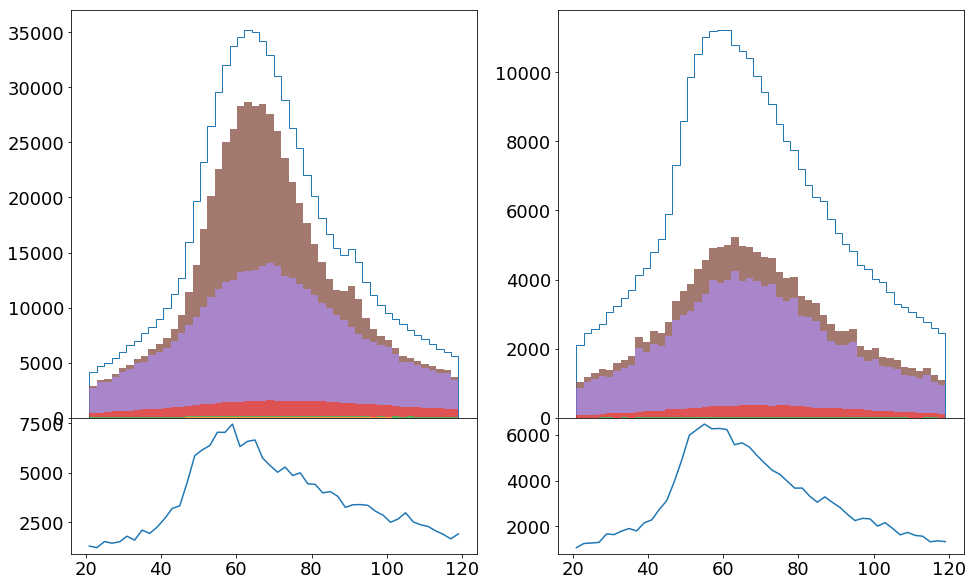

In [241]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10), facecolor='white', gridspec_kw={'height_ratios':[3,1]})
fig.subplots_adjust(hspace=0)

var = 'dilepton1_mass'
ax = axes[0][0]
h_data, bins, _ = ax.hist(df_data_os[var], bins=50, range=(20, 120), histtype='step')
h_mc, _, _ = ax.hist([df_vv_os[var], df_top_os[var], df_ttbar_os[var], df_w_os[var], df_z_os[var]], 
                     bins=50, 
                     range=(20, 120), 
                     histtype='stepfilled', 
                     alpha=0.8, 
                     weights=[df_vv_os['weight'], df_top_os['weight'], df_ttbar_os['weight'], df_w_os['weight'], df_z_os['weight']], 
                     stacked=True)

ax = axes[1][0]
diff = h_data - h_mc[-1]
dx = (bins[1:] - bins[:-1])/2
x = bins[:-1] + dx
ax.plot(x, diff)

ax = axes[0][1]
h_data, bins, _ = ax.hist(df_data_ss[var], bins=50, range=(20, 120), histtype='step')
h_mc, _, _ = ax.hist([df_vv_ss[var], df_top_ss[var], df_ttbar_ss[var], df_w_ss[var], df_z_ss[var]], 
                     bins=50, 
                     range=(20, 120), 
                     histtype='stepfilled', 
                     alpha=0.8, 
                     weights=[df_vv_ss['weight'], df_top_ss['weight'], df_ttbar_ss['weight'], df_w_ss['weight'], df_z_ss['weight']], 
                     stacked=True
                    )

ax = axes[1][1]
diff = h_data - h_mc[-1]
dx = (bins[1:] - bins[:-1])/2
x = bins[:-1] + dx
ax.plot(x, diff)

plt.show()

### Calculating the fake background

The mapping from the same-sign control region to the same-sign signal region is done as follows,

$$
N_{OS} = k(N_{SS,data} - N_{SS,bkg})
$$

where $k$ is some scale factor for normalizing the SS data to OS.  The processes that are take from simulation are subtracted from the SS region to avoid double counting.

In [242]:
# N.B.: RUNNING THIS PANEL REPEATEDLY WILL FUCK SHIT UP YO
# first multiply the weights for the simulated processes by -1
df_ttbar_ss.loc[:,'weight'] *= -1  
df_top_ss.loc[:,'weight'] *= -1  
df_z_ss.loc[:,'weight'] *= -1    
df_w_ss.loc[:,'weight'] *= -1    
df_vv_ss.loc[:,'weight'] *= -1    

# multiply by k and combine the same-sign data and MC
k = 1.3
df_qcd = pd.concat([df_data_ss, df_ttbar_ss, df_top_ss, df_z_ss, df_w_ss, df_vv_ss])
df_qcd.loc[:,'weight'] *= k

/home/naodell/opt/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


/home/naodell/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/home/naodell/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


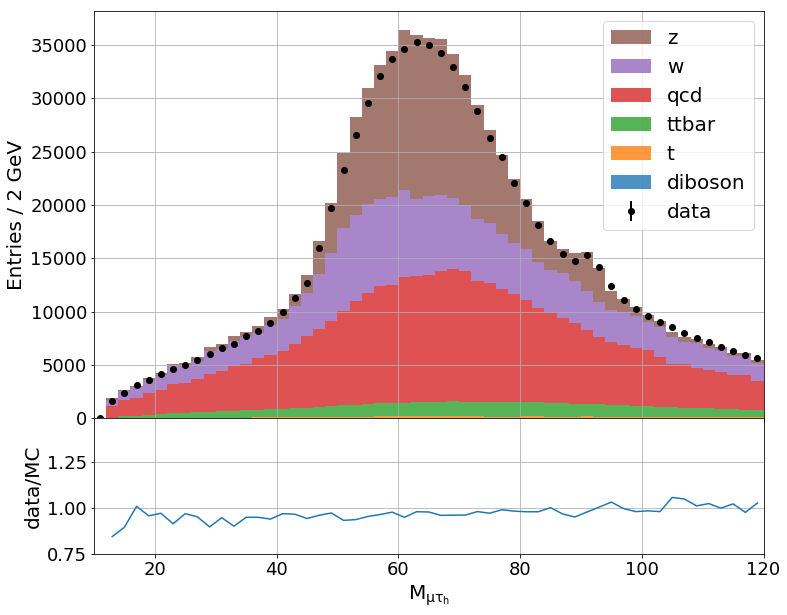

In [243]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), facecolor='white', gridspec_kw={'height_ratios':[3,1]}, sharex=True)
fig.subplots_adjust(hspace=0)

var = 'dilepton1_mass'
nbins = 55  
bin_range = (10, 120)

ax = axes[0]
x, y, yerr = pt.hist_to_errorbar(df_data_os[var], nbins=nbins, xlim=bin_range)
eb = ax.errorbar(x, y, yerr, fmt='ko', capsize=0, elinewidth=2)
h_mc, _, _ = ax.hist([df_vv_os[var], df_top_os[var], df_ttbar_os[var], df_w_os[var], df_qcd[var], df_z_os[var]], 
                     bins=nbins, range=bin_range, 
                     histtype='stepfilled', 
                     alpha=0.8, 
                     stacked=True,
                     weights=[df_vv_os['weight'], df_top_os['weight'], df_ttbar_os['weight'], df_w_os['weight'], df_qcd['weight'], df_z_os['weight']])

ax.legend(['z', 'w', 'qcd', 'ttbar', 't', 'diboson', 'data'])
ax.grid()
ax.set_ylabel('Entries / 2 GeV')
#ax.set_yscale('log')

ax = axes[1]
r = y/h_mc[-1]
ax.plot(x, r)
ax.grid()
ax.set_xlim(bin_range)
ax.set_ylim(0.75, 1.49)
ax.set_xlabel(r'$\sf M_{\mu\tau_{h}}$')
ax.set_ylabel('data/MC')

plt.show()

In [244]:
 df_data_os.to_pickle('data/flatuples/mutau_cr/data.pkl') 
 df_ttbar_os.to_pickle('data/flatuples/mutau_cr/ttbar.pkl') 
 df_top_os.to_pickle('data/flatuples/mutau_cr/tW.pkl')   
 df_z_os.to_pickle('data/flatuples/mutau_cr/zjets.pkl')     
 df_w_os.to_pickle('data/flatuples/mutau_cr/wjets.pkl')     
 df_vv_os.to_pickle('data/flatuples/mutau_cr/diboson.pkl')    